# Perceptron Algorithm

The perceptron step works as follows.<br> 
For a point with coordinates (p,q)(p,q), label yy, and prediction given by the equation 
$\hat{y} = step(w_1x_1 + w_2x_2 + b)$

 If the point is correctly classified, do nothing.  
 If the point is classified positive, but it has a negative label, 
     subtract $\alpha$ p, \alpha q, \alpha from w_1, w_2 and b respectively.  
If the point is classified negative, but it has a positive label, add $\alpha p, \alpha q and \alpha to w_1, w_2 and b respectively.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)
train = pd.read_csv('./data.csv')
values = train.values
y = values[...,2]
X = values[...,:2]

# Setting the random seed
np.random.seed(42)

In [18]:
print(y.shape)
print(X.shape)
for i in range(5):
    print('X[{}]: {} y[{}]: {}'.format(i, X[i], i, y[i]))

(99,)
(99, 2)
X[0]: [0.28774 0.29139] y[0]: 1.0
X[1]: [0.40714 0.17878] y[1]: 1.0
X[2]: [0.2923 0.4217] y[2]: 1.0
X[3]: [0.50922 0.35256] y[3]: 1.0
X[4]: [0.27785 0.10802] y[4]: 1.0


In [37]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    print('x_min {}, x_max {}'.format(x_min, x_max))
    print('y_min {}, y_max {}'.format(x_min, x_max))
    
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
        #print('W[0] {}, W[1] {}, b {}'.format(W[0], W[1], b))
        #print('boundry_lines[{}]: {}'.format(i, boundary_lines[i]))
    return boundary_lines

x_min 0.0084492, x_max 1.0
y_min 0.0084492, y_max 1.0


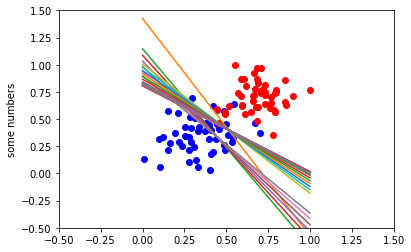

In [38]:
boundary_lines = trainPerceptronAlgorithm(X, y)

for i in range(len(X)):
    if y[i] == 1:
        plt.plot(X[i][0], X[i][1], 'bo')
    else:
        plt.plot(X[i][0], X[i][1], 'ro')
        
plt.ylabel('some numbers')

x_min, x_max = min(X.T[0]), max(X.T[0])


def calculateX2(param, line):
    # x2 = (-b / w2) - (w1 / w2) x1
    return line[1] + line[0] * param


for i in range(len(boundary_lines)):
    plt.plot([0, 1], [calculateX2(0, boundary_lines[i]), calculateX2(1, boundary_lines[i])])

plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.show()